In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lego-analysis/Data/lego_sets.csv')
df

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft
11982,NaN,NaN,2006,NaN,NaN,Super Heroes
11983,NaN,NaN,2017,NaN,NaN,Minecraft
11984,NaN,NaN,2017,8.0,NaN,Super Heroes


## Question 1: What are the top 5 sets with the most pieces, and how many pieces does each set have?

In [3]:
df_top5 = df[['name', 'num_parts']].fillna(0).astype({'num_parts': int}).sort_values(by='num_parts', ascending=False)
df_top5.head()

,name,num_parts
170,Taj Mahal,5922
1371,Window Exploration Bag,5200
161,Millennium Falcon - UCS,5195
3225,Personalised Mosaic Portrait,4501
234,Big Ben,4166


## Question 2: What percentage of all licensed sets ever released were Star Wars themed?

In [4]:
parent_theme = pd.read_csv('lego-analysis/Data/parent_themes.csv')
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [5]:
merged = df.merge(parent_theme, left_on='parent_theme', right_on='name')
merged.drop(columns = 'name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [6]:
licensed = merged[merged['is_licensed']]
licensed = licensed.dropna(subset=['set_num'])
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True


In [7]:
star_wars = licensed[licensed['parent_theme']=='Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [8]:
percentage = int(star_wars.shape[0]/licensed.shape[0]*100)
print('Answer: ' + str(percentage) + '%')

Answer: 51%


## Question 3: In which Year was Star Wars not the most popular licensed theme?

In [9]:
star_wars = star_wars.sort_values('year')
license_counts = star_wars.groupby(['year', 'parent_theme']).sum().reset_index()

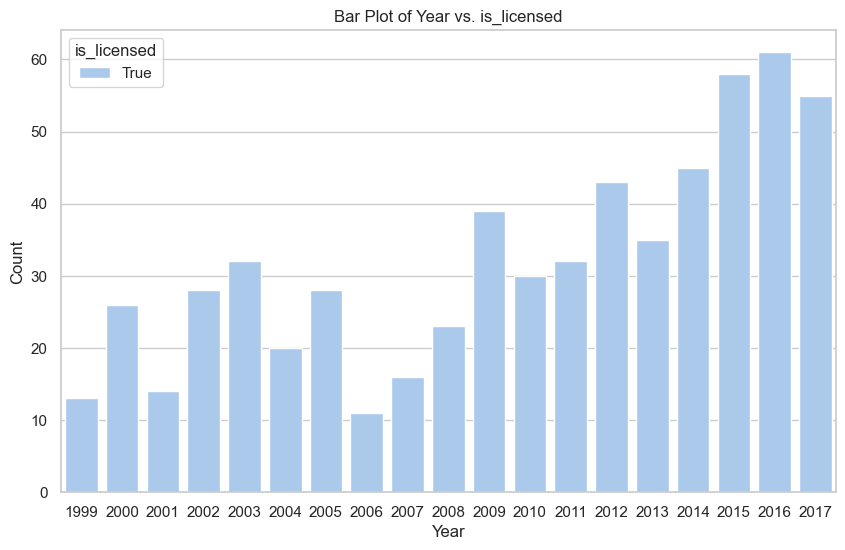

In [10]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=star_wars, x='year', hue='is_licensed', palette='pastel')
plt.title('Bar Plot of Year vs. is_licensed')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


## Question 4: How many different sets per year?

In [11]:
sets_per_year = merged[~merged['set_num'].isnull()]
sets_per_year['count'] = 1
sets_per_year.groupby(['year']).sum().reset_index()[['year', 'count']]

C:\Users\mumuk\AppData\Local\Temp\ipykernel_23608\992888593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sets_per_year['count'] = 1


,year,count
0,1950,7
1,1953,4
2,1954,14
3,1955,28
4,1956,12
...,...,...
61,2013,593
62,2014,715
63,2015,670
64,2016,608


C:\Users\mumuk\AppData\Local\Temp\ipykernel_23608\2740788072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sets_per_year['count'] = 1


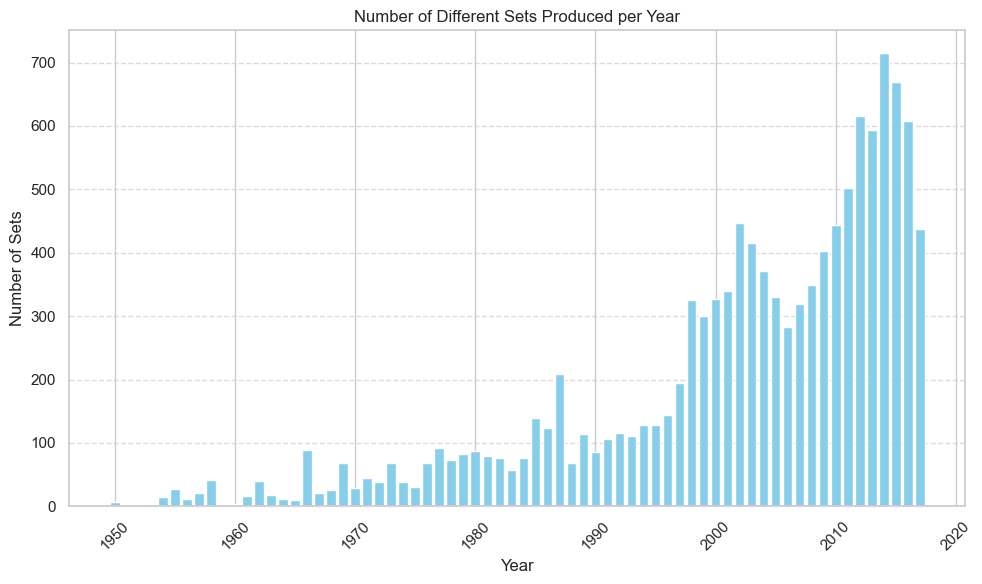

In [13]:
import matplotlib.pyplot as plt

# Assuming sets_per_year dataframe is already defined and contains the required data
sets_per_year = merged[~merged['set_num'].isnull()]
sets_per_year['count'] = 1
sets_per_year = sets_per_year.groupby(['year']).sum().reset_index()[['year', 'count']]

# Data
years = sets_per_year['year']
counts = sets_per_year['count']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(years, counts, color='skyblue')
plt.title('Number of Different Sets Produced per Year')
plt.xlabel('Year')
plt.ylabel('Number of Sets')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
